# Bike Trip Data Analysis and Classification

## Description

### Attributes Description:
1. Duration – Duration of trip
2. Start Date – Includes start date and time
3. End Date – Includes end date and time
4. Start Station – Includes starting station name and number
5. End Station – Includes ending station name and number
6. Bike Number – Includes ID number of bike used for the trip
7. Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure).

### Questions:
1. What is the most popular start and end station?
2. What is the most used Bike?
3. What is the most popular Member Type
4. Difference of Duration of each Member Type
5. Difference of Duration of each Start station
6. The most profitable station in general
7. Most popular date for biking and why is that
8. Classification for Member type

## Importing Necessary Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('2017Q1-capitalbikeshare-tripdata.csv',header=0)

## Preprocessing and Exploratory Data Analysis

In [3]:
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [4]:
df.dtypes

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [5]:
df.isnull().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [6]:
df.shape

(646510, 9)

In [7]:
df['Member type'].astype('category')

0         Member
1         Casual
2         Casual
3         Casual
4         Casual
           ...  
646505    Member
646506    Member
646507    Member
646508    Member
646509    Member
Name: Member type, Length: 646510, dtype: category
Categories (2, object): [Casual, Member]

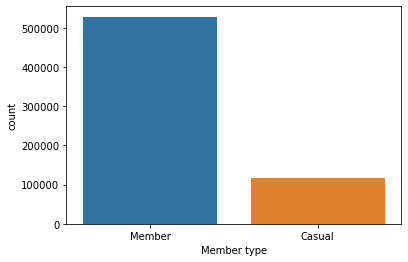

In [8]:
sns.countplot(df['Member type'])

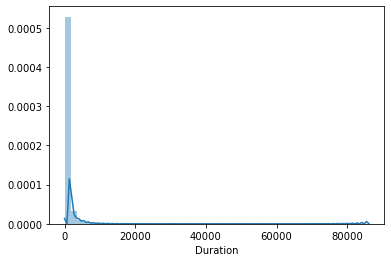

In [9]:
sns.distplot(df['Duration'])

In [10]:
df['Duration'].describe(percentiles=[0.25,0.5,0.75,0.95])

count    646510.000000
mean       1010.444949
std        2087.021859
min          60.000000
25%         373.000000
50%         626.000000
75%        1064.000000
95%        2789.000000
max       86066.000000
Name: Duration, dtype: float64

In [11]:
print(df['Duration'].quantile(0.10))
print(df['Duration'].quantile(0.90))

241.0
1702.0


In [12]:
df["Duration"] = np.where(df["Duration"] <241.0, 241.0,df['Duration'])
df["Duration"] = np.where(df["Duration"] >1702.0, 1702.0,df['Duration'])
print(df['Duration'].skew())

0.7715811065789946


In [13]:
df['Start date']=pd.to_datetime(df['Start date']).dt.date
df['End date']=pd.to_datetime(df['End date']).dt.date

In [14]:
df_cleaned=df.drop(['Start station number','End station number'],axis=1)

In [15]:
df_cleaned['Start date']=pd.to_datetime(df_cleaned['Start date'], format='%Y-%m-%d')
df_cleaned['End date']=pd.to_datetime(df_cleaned['End date'], format='%Y-%m-%d')

In [16]:
df_cleaned.head()

,Duration,Start date,End date,Start station,End station,Bike number,Member type
0,241.0,2017-01-01,2017-01-01,3rd & Tingey St SE,M St & New Jersey Ave SE,W00869,Member
1,1676.0,2017-01-01,2017-01-01,Lincoln Memorial,8th & D St NW,W00894,Casual
2,1356.0,2017-01-01,2017-01-01,Henry Bacon Dr & Lincoln Memorial Circle NW,New York Ave & 15th St NW,W21945,Casual
3,1327.0,2017-01-01,2017-01-01,Henry Bacon Dr & Lincoln Memorial Circle NW,New York Ave & 15th St NW,W20012,Casual
4,1636.0,2017-01-01,2017-01-01,Lincoln Memorial,8th & D St NW,W22786,Casual


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646510 entries, 0 to 646509
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Duration       646510 non-null  float64       
 1   Start date     646510 non-null  datetime64[ns]
 2   End date       646510 non-null  datetime64[ns]
 3   Start station  646510 non-null  object        
 4   End station    646510 non-null  object        
 5   Bike number    646510 non-null  object        
 6   Member type    646510 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 34.5+ MB


## Univariate Analysis

In [18]:
df_cleaned['Start station'].value_counts().head()

Columbus Circle / Union Station         13712
Massachusetts Ave & Dupont Circle NW     9071
15th & P St NW                           8195
Jefferson Dr & 14th St SW                8026
Lincoln Memorial                         7876
Name: Start station, dtype: int64

### Most Popular Start Stations

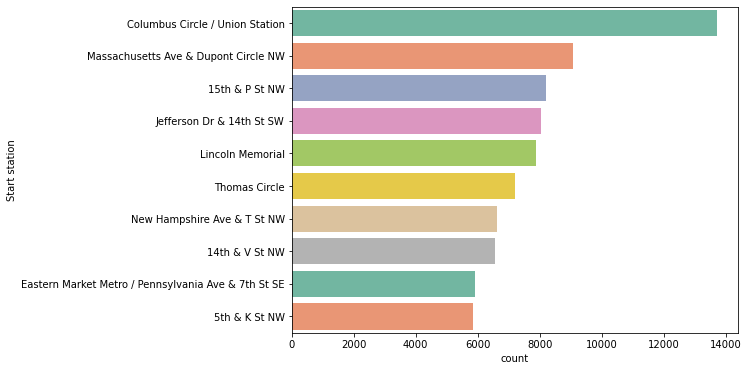

In [19]:
plt.figure(figsize=[8,6])
sns.countplot(y=df_cleaned['Start station'],order=df_cleaned['Start station'].value_counts().iloc[:10].index, palette='Set2')

As you can see from the top 10 most popular start station graph above, the most popular start station is Columbus Circle / Union Station.

### Most Popular End Stations

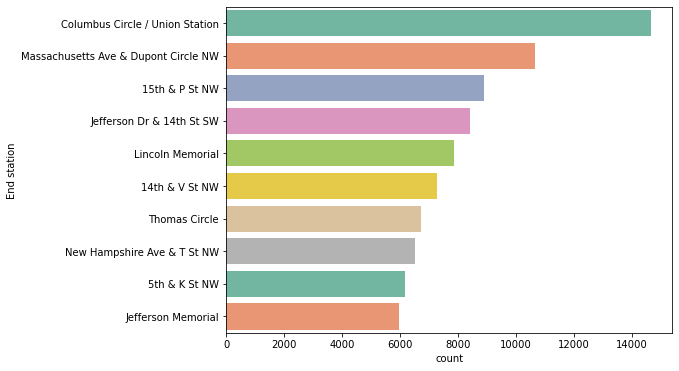

In [20]:
plt.figure(figsize=[8,6])
sns.countplot(y=df_cleaned['End station'],order=df_cleaned['End station'].value_counts().iloc[:10].index, palette='Set2')

As you can see from the top 10 most popular end station graph above, the most popular end station is Columbus Circle / Union Station.

In [21]:
total_station=df_cleaned['Start station'].value_counts().add(df_cleaned['End station'].value_counts(),fill_value=0)

In [22]:
total_station.sort_values(ascending=False,inplace=True)
total_station=total_station.iloc[:10]

### Most Popular Stations

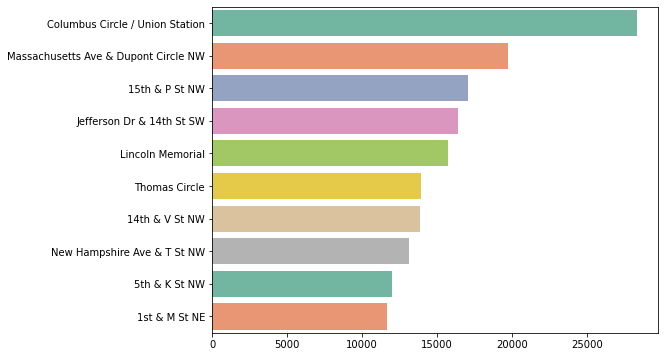

In [23]:
plt.figure(figsize=[8,6])
sns.barplot(x=total_station.values,y=total_station.index,palette='Set2')

As you can see from the top 10 most popular station graph above, the most popular station is Columbus Circle / Union Station.

### Most Used Bike

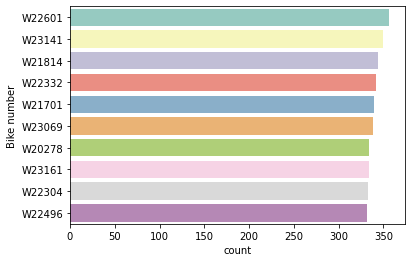

In [24]:
sns.countplot(y=df_cleaned['Bike number'], order=df_cleaned['Bike number'].value_counts().iloc[:10].index, palette='Set3')

As you can see from the top 10 most used bike graph above, there's no significant difference between the use of the bikes.

### Most Popular Member Type

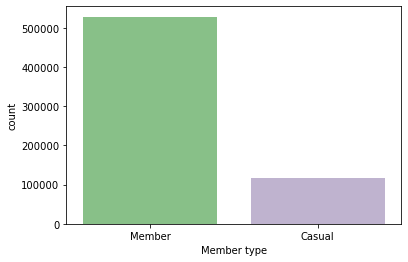

In [25]:
sns.countplot(df_cleaned['Member type'], palette='Accent')

## Bivariate Analysis

### Difference of Duration for Each Member Type

In [26]:
duration_member= df_cleaned.groupby('Member type', as_index=False)['Duration'].mean()

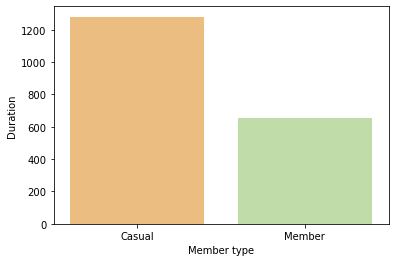

In [27]:
sns.barplot(x=duration_member['Member type'],y=duration_member['Duration'], palette='Spectral')

As you can see from the graph above, casual has a higher biking duration by a significant margin than a member.

### Difference of Duration for Each Start Station

In [28]:
duration_station=df_cleaned.groupby('Start station', as_index=False)['Duration'].mean()

In [29]:
duration_station.sort_values('Duration', ascending=False, inplace=True)

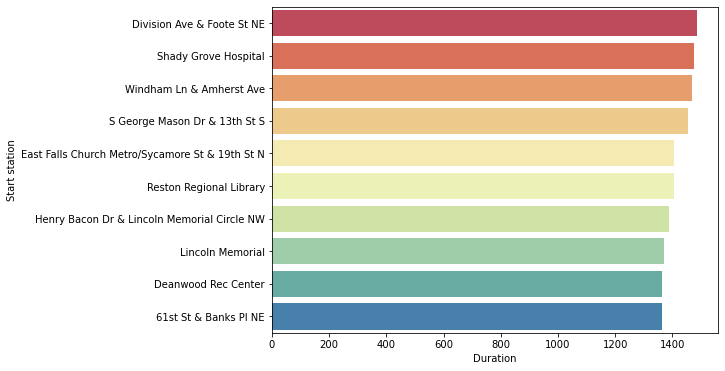

In [30]:
plt.figure(figsize=[8,6])
sns.barplot(x=duration_station['Duration'],y=duration_station['Start station'].iloc[:10], palette='Spectral')

As you can see from the graph above, there's no significant difference in mean duration from the top 10 stations. However, there's an interesting insight that can be seen, the most popular start station (Columbus Circle / Union Station) is nowhere to be seen here.

### The most profitable station

In [31]:
duration_station_sum=df_cleaned.groupby(['Start station','Member type'], as_index=False)['Duration'].sum()
duration_station_sum.sort_values('Duration', ascending=False, inplace=True)

In [32]:
duration_station_sum.head()

,Start station,Member type,Duration
571,Lincoln Memorial,Casual,8874874.0
525,Jefferson Dr & 14th St SW,Casual,8375702.0
391,Columbus Circle / Union Station,Member,7221420.0
517,Henry Bacon Dr & Lincoln Memorial Circle NW,Casual,5892428.0
793,Smithsonian-National Mall / Jefferson Dr & 12t...,Casual,5844687.0


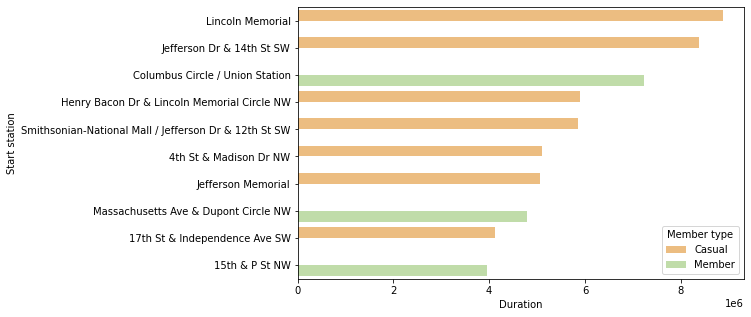

In [33]:
plt.figure(figsize=[8,5])
sns.barplot(x=duration_station_sum['Duration'],y=duration_station_sum['Start station'].iloc[:10], palette='Spectral', hue=duration_station_sum['Member type'])

As you can see from the graph above, the most profitable station is Lincoln Memorial, with a member type of Casual.

### Most popular date and why is that

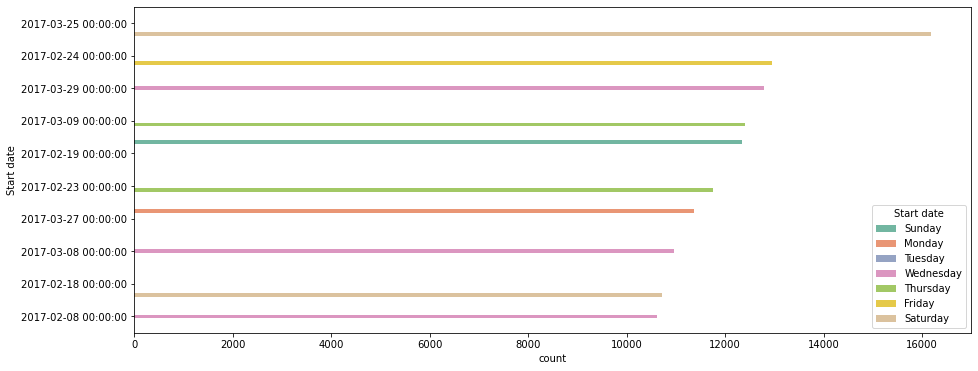

In [34]:
plt.figure(figsize=[15,6])
sns.countplot(y=df_cleaned['Start date'], order=df_cleaned['Start date'].value_counts().iloc[:10].index, palette='Set2', hue=df_cleaned['Start date'].dt.day_name())

I hypothesize that the most popular day to ride a bike is at the weekend, it's true for 25th March 2017, but not in the top 10 most used biking.

## Classification, Training and Testing Model

### Importing Necessary Library

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
LE = LabelEncoder()

### Transform Datetime into String

In [36]:
df_cleaned['Start date'].astype('str')

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
646505    2017-03-31
646506    2017-03-31
646507    2017-03-31
646508    2017-03-31
646509    2017-03-31
Name: Start date, Length: 646510, dtype: object

In [37]:
df_cleaned['End date'].astype('str')

0         2017-01-01
1         2017-01-01
2         2017-01-01
3         2017-01-01
4         2017-01-01
             ...    
646505    2017-04-01
646506    2017-04-01
646507    2017-04-01
646508    2017-04-01
646509    2017-04-01
Name: End date, Length: 646510, dtype: object

### Convert Categorical Data into Integer

In [38]:
X = df_cleaned.drop('Member type',axis=1).apply(LabelEncoder().fit_transform)

In [39]:
for row in X:
    X[row]=pd.to_numeric(X[row])

In [40]:
y = df_cleaned['Member type'].values
X_encoded = X.values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.3,random_state=42)

### Predicting Model With KNN

In [42]:
knn_scaled = pipeline.fit(X_train,y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)*100))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)*100))

Accuracy with Scaling: 0.8632039720963326
Accuracy without Scaling: 0.8574551566616655


### Searching Feature Importance and Training Model with Random Forest Classifier

In [43]:
RFC= RandomForestClassifier(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [48]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=100, n_estimators=200,
                       n_jobs=4, random_state=22)

In [49]:
print("Accuracy Score of Random Forest Classifier on test set: {}".format(RFC.score(X_test,y_test)*100))

Accuracy Score of Random Forest Classifier on test set: 87.44902115460962


In [46]:
coef=pd.Series(RFC.feature_importances_, X.columns).sort_values(ascending=False)

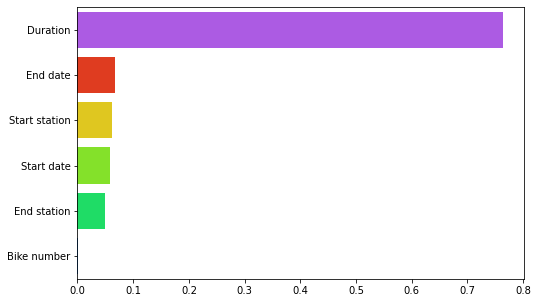

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(coef.values, coef.index, palette = 'gist_ncar_r')

As you can see from the graph above, the most important feature to determine the member type is Duration.